In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_openai import ChatOpenAI

In [4]:
model = ChatOpenAI()
model .invoke("Prompt chaning in the Langgraph?")

AIMessage(content="Changes in the language graph can occur for various reasons, such as cultural shifts, technological advancements, migration patterns, and societal developments. These changes can manifest in the form of new words and expressions entering the language, old words falling out of use, shifts in grammar rules, and changes in language usage and pronunciation. In today's digital age, the language graph is evolving rapidly due to the widespread use of social media, the internet, and other communication technologies. As a result, languages are constantly adapting and evolving to meet the needs and preferences of their speakers. It is important for linguists, educators, and language enthusiasts to stay informed about these changes in order to better understand and appreciate the dynamic nature of language.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 142, 'prompt_tokens': 15, 'total_tokens': 157, 'completion_tokens_details': {'

In [ ]:
class BlogState(TypedDict):
    title : str 
    outline : str 
    content : str
    

In [6]:
def create_outline(state:BlogState):
    #fetch the title
    title = state["title"]

    #Call the LLM Outline
    prompt = f'Generate a Detailed Outline for a Blog on the topic-{title}'
    outline = model.invoke(prompt).content
    
    #Update the State 
    state['outline'] = outline
    
    return state

In [7]:
def create_blog(state:BlogState):
    title = state['title']
    outline = state['outline']

    prompt = f'write a deatiled blog on the title-{title} using the following outline\n{outline}'
    content = model.invoke(prompt).content
    #update in the State
    state['content'] = content

    return state

In [9]:
graph = StateGraph(BlogState)
#Add the Nodes
graph.add_node('create_outline',create_outline)
graph.add_node('create_blog',create_blog)

#Edges
graph.add_edge(START,'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

#Compile
workflow = graph.compile()

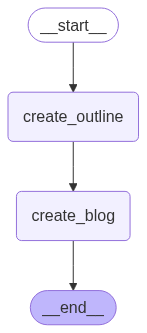

In [10]:
from IPython.display import Image, display

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [12]:
### Exceute the graph
input_state =  workflow.invoke({'title':"Rise of AI in Software?"})
input_state 

{'title': 'Rise of AI in Software?',
 'outline': 'I. Introduction\nA. Definition of AI in software\nB. Brief history of AI in software\nC. Importance of AI in software development\n\nII. Applications of AI in Software\nA. Automation of repetitive tasks \nB. Personalization of user experience\nC. Enhancing data analysis capabilities\nD. Improving security measures\nE. Facilitating decision-making processes\n\nIII. Impact of AI on Software Development\nA. Increased efficiency and productivity\nB. Reduction in human error\nC. Creation of new job opportunities\nD. Concerns about job displacement\nE. Ethical considerations in AI development\n\nIV. Challenges and Limitations of AI in Software\nA. Data privacy and security concerns\nB. Bias and discrimination in AI algorithms\nC. Technical limitations and scalability issues\nD. Need for continuous learning and improvement\nE. Potential societal impacts of widespread AI implementation\n\nV. Future Trends in AI Software Development\nA. Integrat

In [13]:
print(input_state ['content'])

The Rise of AI in Software

I. Introduction

A. Definition of AI in software
Artificial Intelligence (AI) in software refers to the development of intelligent systems that can perform tasks that typically require human intelligence, such as decision-making, problem-solving, and language processing.

B. Brief history of AI in software
AI has its roots in the 1950s, with early pioneers like Alan Turing and John McCarthy laying the groundwork for intelligent machines. Over the years, advancements in computing power and algorithms have led to the widespread adoption of AI in various software applications.

C. Importance of AI in software development
AI has revolutionized the software industry by enabling developers to create smarter, more efficient systems that can automate tasks, analyze data, and provide personalized user experiences. The integration of AI in software has the potential to streamline processes, increase productivity, and improve decision-making capabilities.

II. Applicat

In [14]:
### Exceute the graph
input_state =  workflow.invoke({'title':"Traditional Machine Learning and Deep Learning Vs Generative and Agentic AI"})
input_state 

{'title': 'Traditional Machine Learning and Deep Learning Vs Generative and Agentic AI',
 'outline': 'I. Introduction\nA. Explanation of traditional machine learning and deep learning\nB. Definition of generative and agentic AI\nC. Importance of understanding the differences between the two types of AI\n\nII. Traditional Machine Learning vs Generative AI\nA. Overview of traditional machine learning\n1. Explanation of supervised and unsupervised learning\n2. Examples of traditional machine learning algorithms\nB. Overview of generative AI\n1. Explanation of how generative AI creates new data\n2. Examples of generative AI applications\n\nIII. Deep Learning vs Agentic AI\nA. Overview of deep learning\n1. Explanation of neural networks and deep learning models\n2. Examples of deep learning applications\nB. Overview of agentic AI\n1. Explanation of how agentic AI can act autonomously\n2. Examples of agentic AI applications\n\nIV. Comparison of Traditional Machine Learning and Deep Learning 

In [15]:
print(input_state ['content'])

In the rapidly evolving field of artificial intelligence (AI), two distinct categories have emerged: traditional machine learning and deep learning on one hand, and generative and agentic AI on the other. Understanding the differences between these types of AI is crucial for businesses and organizations looking to leverage AI technology effectively. In this blog, we will explore the characteristics of traditional machine learning and deep learning compared to generative and agentic AI, as well as their real-world applications and future implications.

Traditional machine learning, which includes supervised and unsupervised learning methods, involves training algorithms to make predictions or decisions based on input data. Supervised learning requires labeled data for training, while unsupervised learning aims to find patterns and relationships in data without predefined labels. Examples of traditional machine learning algorithms include linear regression, decision trees, and clustering